In [1]:
%pylab inline

import scipy.stats as st
import scipy.integrate as si
from scipy.interpolate import UnivariateSpline

def np_hist_plot(arr, bins=10, label=None):
    p, x = np.histogram(arr, bins=bins, normed=True) # bin it into n = N/10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=bins)
    plt.plot(x, f(x), label=label)

Populating the interactive namespace from numpy and matplotlib


# rejection sampling

In [2]:
def rejection_sampling(p, q, m, n=1):
    cnt = 0
    accepts = []
    while cnt < n:
        x = q()
        u = np.random.uniform(0, 1)
        if u * m * q(x) < p(x):
            cnt += 1
            accepts.append(x)
        else:
            pass

    return accepts

class ProbabilityDistribution:
    def __init__(self, interval, pdf_func):
        z = si.quad(pdf_func, *interval)[0]
        self.pdf = lambda x: pdf_func(x) / z
        self.itv = interval

    def sample(self, n):
        pass

    def __call__(self, x=None):
        if x is None:
            return self.sample(n=1)
        else:
            if x > self.itv[1] or x < self.itv[0]:
                return 0
            return self.pdf(x)

class NormalDistribution:
    def __init__(self, mean=0, std=1):
        self.mean = mean
        self.std  = std
        
    def sample(self, n):
        return np.random.normal(size=n, loc=self.mean, scale=self.std)
    
    def pdf(self, x):
        return st.norm.pdf(x, self.mean, self.std)
    
    def __call__(self, x=None):
        if x is None:
            return self.sample(n=1)
        else:
            return self.pdf(x)

In [3]:
pdf_func = lambda x: (x - 0.5) ** 2
pd = ProbabilityDistribution([0, 1], pdf_func)
qu = ProbabilityDistribution([0, 1], lambda x: 1)
qu.sample = lambda n: np.random.uniform(qu.itv[0], qu.itv[1])

qn = NormalDistribution()

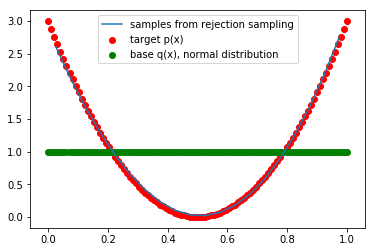

In [4]:
a = np.arange(0, 100) / 99
plt.scatter(a, [pd.pdf(aa) for aa in a], c='r', label='target p(x)')
plt.scatter(a, [qu.pdf(aa) for aa in a], c='g', label='base q(x), normal distribution')

accepted_samples = rejection_sampling(pd, qu, 100, n=3000)
np_hist_plot(accepted_samples, bins=20, label='samples from rejection sampling')

plt.legend()
plt.show()

### test difference using different M

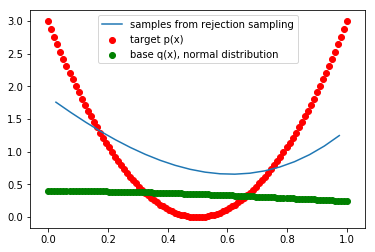

In [5]:
a = np.arange(0, 100) / 99
plt.scatter(a, [pd.pdf(aa) for aa in a], c='r', label='target p(x)')
plt.scatter(a, [qn.pdf(aa) for aa in a], c='g', label='base q(x), normal distribution')

accepted_samples = rejection_sampling(pd, qn, 1, n=3000)
np_hist_plot(accepted_samples,bins=20, label='samples from rejection sampling')

plt.legend()
plt.show()

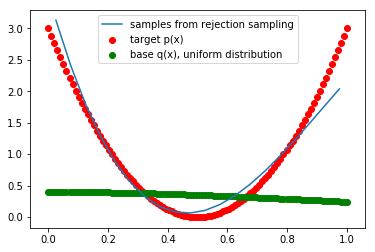

In [6]:
a = np.arange(0, 100) / 99
plt.scatter(a, [pd.pdf(aa) for aa in a], c='r', label='target p(x)')
plt.scatter(a, [qn.pdf(aa) for aa in a], c='g', label='base q(x), uniform distribution')


accepted_samples = rejection_sampling(pd, qn, 7, n=3000)
np_hist_plot(accepted_samples, bins=20, label='samples from rejection sampling')

plt.legend()
plt.show()

### sample rand(0, 4) from rand(0, 5) using rejection sampling

In [7]:
r_discrete_0_to_4 = ProbabilityDistribution([0, 3], lambda x: 1)
r_discrete_0_to_5 = ProbabilityDistribution([0, 4], lambda x: 1)

In [8]:
def is_int(val):
    if type(val) == int:
        return True
    else:
        if val.is_integer():
            return True
        else:
            return False

def discrete_sample(n, begin=0, end=2):
    u = np.random.uniform(size=n)
    return np.floor(u * (end - begin))[0]

def discrete_pdf(x, begin=0, end=2):
    if not is_int(x):
        return 0.0001
    
    return 1 / (end - begin)

r_discrete_0_to_4.sample = lambda n: discrete_sample(n, end=4)
r_discrete_0_to_4.pdf = lambda x: discrete_pdf(x, end=4)
r_discrete_0_to_5.sample = lambda n: discrete_sample(n, end=5)
r_discrete_0_to_5.pdf = lambda x:  discrete_pdf(x, end=5)

In [9]:
accepted_samples = rejection_sampling(r_discrete_0_to_4, r_discrete_0_to_5, m=10, n=1000)

In [10]:
for i in range(5):
    print(i, accepted_samples.count(i))

0 248
1 244
2 252
3 256
4 0
